ℹ️ Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          1000 non-null   float64
 4   24h         1000 non-null   float64
 5   7d          1000 non-null   float64
 6   24h_volume  1000 non-null   float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
 9   SourceFile  1000 non-null   object 
dtypes: float64(6), object(4)
memory usage: 78.3+ KB

✨ Summary Statistics:


,price,1h,24h,7d,24h_volume,mkt_cap
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.015918,0.893238,0.547574,0.112537,0.004960,0.004754
std,0.111231,0.033594,0.048322,0.044303,0.047645,0.049017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000005,0.882353,0.529027,0.100223,0.000032,0.000064
50%,0.000027,0.888611,0.541292,0.107917,0.000144,0.000188
75%,0.000175,0.904881,0.556827,0.114983,0.000677,0.000682
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



🚫 Missing Values:
coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
SourceFile    0
dtype: int64


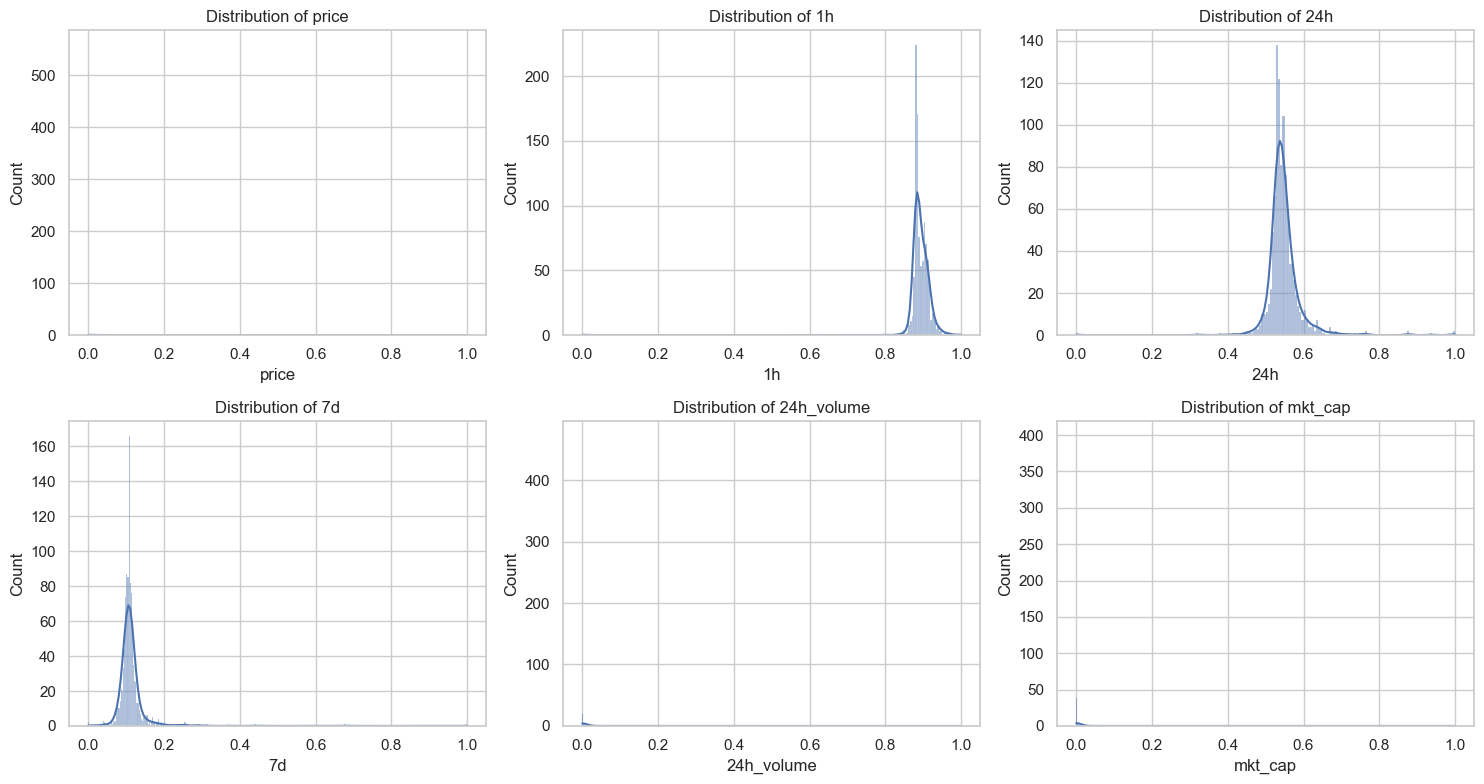

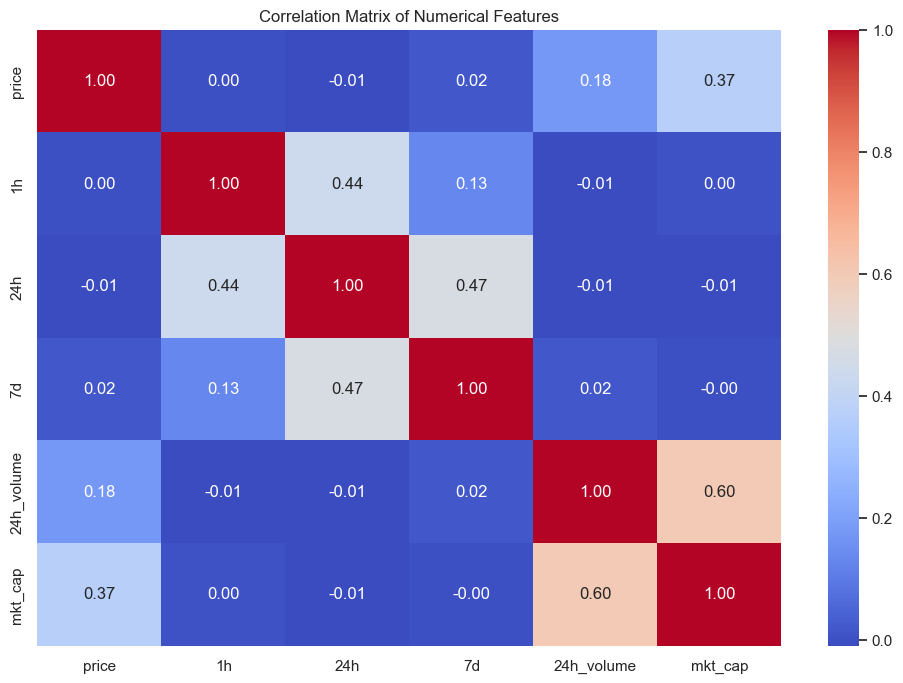

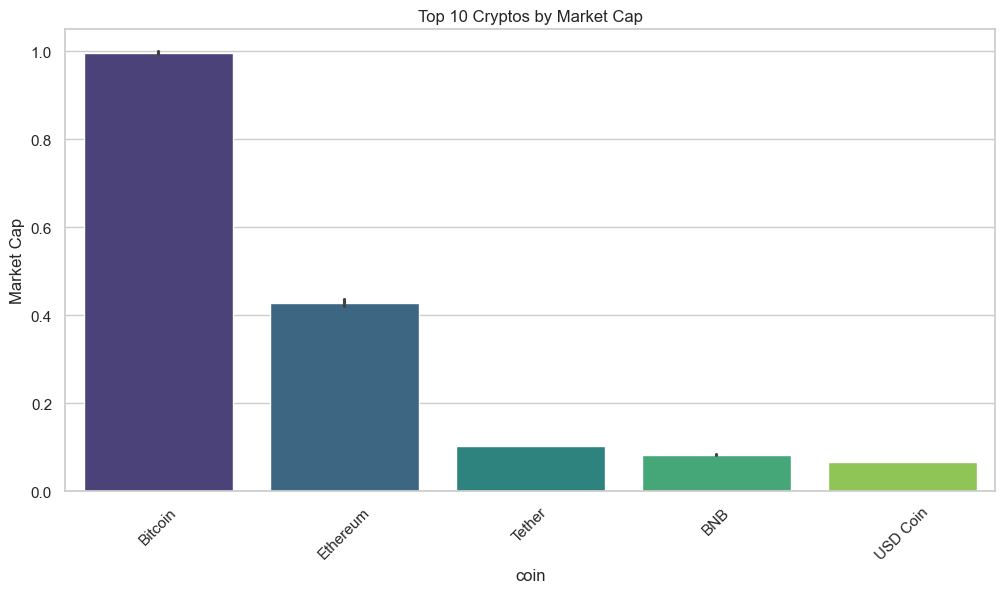

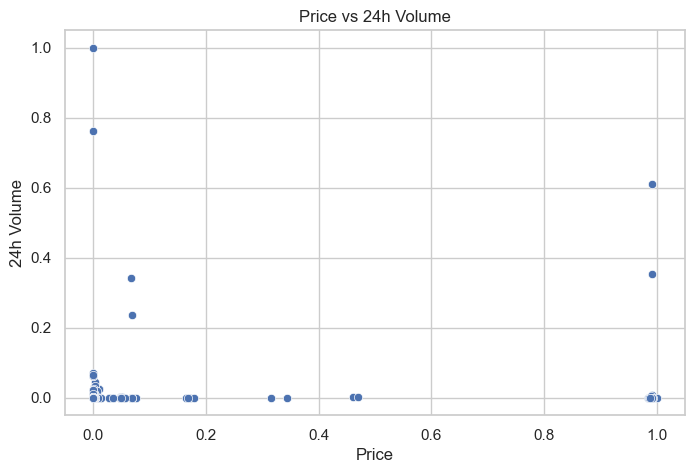


✅ EDA Summary:
- Numeric features analyzed for distribution.
- Correlation matrix generated to find feature relationships.
- Top coins by market cap identified.
- Visual check on price vs volume done.


In [1]:
# 🧠 Exploratory Data Analysis (EDA)
# This notebook performs EDA on the cleaned cryptocurrency dataset to uncover patterns, trends, and correlations.

# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

# 📂 Load data
data_path = os.path.join("..", "data", "cleaned", "cleaned_data.csv")
df = pd.read_csv(data_path)

# 📝 Dataset Overview
print("ℹ️ Data Info:")
df.info()

print("\n✨ Summary Statistics:")
display(df.describe())

print("\n🚫 Missing Values:")
print(df.isnull().sum())

# 📈 Distribution of Numerical Features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

num_plots = len(numeric_cols)
cols = 3
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

# 🔗 Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# 🏅 Top 10 Cryptos by Market Capitalization
if 'mkt_cap' in df.columns and 'coin' in df.columns:
    top_mktcap = df.sort_values('mkt_cap', ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='coin', y='mkt_cap', hue='coin', data=top_mktcap, palette='viridis', legend=False)
    plt.title("Top 10 Cryptos by Market Cap")
    plt.xticks(rotation=45)
    plt.ylabel("Market Cap")
    plt.show()
else:
    print("Columns 'mkt_cap' or 'coin' not found.")

# 💹 Price vs 24h Volume
if 'price' in df.columns and '24h_volume' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='price', y='24h_volume', data=df)
    plt.title("Price vs 24h Volume")
    plt.xlabel("Price")
    plt.ylabel("24h Volume")
    plt.show()
else:
    print("Columns 'price' or '24h_volume' not found.")

# ✅ Summary of EDA
print("\n✅ EDA Summary:")
print("- Numeric features analyzed for distribution.")
print("- Correlation matrix generated to find feature relationships.")
print("- Top coins by market cap identified.")
print("- Visual check on price vs volume done.")



